Exploratory Data Analysis of the Lending Club Dataset

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
lc_data_2016_17= pd.read_csv("M:\\Terms\\Fall 2021\\DS5110\\Project\\archive\\lc_2016_2017.csv")

D:\Anaconda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
lc_data_2005_15=pd.read_csv("M:\\Terms\\Fall 2021\\DS5110\\Project\\archive\\lc_loan.csv")

D:\Anaconda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
lc_data_2005_15=lc_data_2005_15.drop(['id','member_id','desc','pymnt_plan','addr_state','funded_amnt','funded_amnt_inv',
              'mths_since_last_delinq','mths_since_last_record','initial_list_status','out_prncp_inv',
             'total_pymnt_inv','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq',
                      'open_acc_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','il_util','open_rv_12m',
                     'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl',
                      'inq_last_12m','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
                      'collections_12_mths_ex_med','mths_since_last_major_derog','policy_code',
                      'recoveries','collection_recovery_fee','earliest_cr_line','delinq_2yrs','inq_last_6mths',
                      'out_prncp','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee',
                        'tot_coll_amt','total_bal_il','tot_cur_bal','open_il_6m','open_il_6m','url'],axis=1)

In [6]:
lc_data_2016_17=lc_data_2016_17.drop(['id','member_id','desc','pymnt_plan','addr_state','funded_amnt','funded_amnt_inv',
              'mths_since_last_delinq','mths_since_last_record','initial_list_status','out_prncp_inv',
             'total_pymnt_inv','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq',
                      'open_acc_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','il_util','open_rv_12m',
                     'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl',
                      'inq_last_12m','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
                      'collections_12_mths_ex_med','mths_since_last_major_derog','policy_code',
                      'recoveries','collection_recovery_fee','earliest_cr_line','delinq_2yrs','inq_last_6mths',
                      'out_prncp','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee',
                        'tot_coll_amt','total_bal_il','tot_cur_bal'],axis=1)

In [7]:
lc_data_2016_17.head(15)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,purpose,title,zip_code,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type
0,2300,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.00,...,credit_card,Credit card refinancing,148xx,21.61,4,0,3911.0,55.1,6,Individual
1,16000,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.00,...,debt_consolidation,Debt consolidation,021xx,25.61,9,0,33752.0,105.8,26,Individual
2,6025,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.00,...,home_improvement,Home improvement,018xx,8.88,11,0,12425.0,44.9,27,Individual
3,20400,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.00,...,car,Car financing,913xx,27.06,15,0,8769.0,18.7,19,Individual
4,13000,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.00,...,debt_consolidation,Debt consolidation,560xx,6.79,5,0,6866.0,88.0,24,Individual
5,12000,36 months,9.44,384.06,B,B1,Teacher,10+ years,MORTGAGE,70000.00,...,debt_consolidation,Debt consolidation,184xx,18.34,14,1,15025.0,58.2,30,Individual
6,6000,36 months,10.42,194.79,B,B3,Office Clerk,7 years,MORTGAGE,37107.19,...,medical,Medical expenses,773xx,30.63,10,1,9332.0,59.1,28,Individual
7,12000,60 months,15.05,285.80,C,C4,PROGRAM DIRECTOR,6 years,RENT,69800.00,...,debt_consolidation,Debt consolidation,953xx,31.43,10,0,15227.0,79.7,12,Individual
8,11575,36 months,7.35,359.26,A,A4,Solutions Architect,6 years,OWN,153000.00,...,credit_card,Credit card refinancing,923xx,16.99,20,1,8550.0,22.7,46,Individual
9,20400,60 months,7.97,413.35,A,A5,asst plant manager,10+ years,MORTGAGE,110000.00,...,major_purchase,Major purchase,286xx,11.07,8,0,5294.0,8.1,21,Individual


In [8]:
frames = [lc_data_2005_15, lc_data_2016_17]
lc_data=pd.concat(frames)

In [9]:
lc_data.head(15)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,purpose,title,zip_code,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type
0,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,credit_card,Computer,860xx,27.65,3.0,0.0,13648.0,83.7,9.0,INDIVIDUAL
1,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,car,bike,309xx,1.00,3.0,0.0,1687.0,9.4,4.0,INDIVIDUAL
2,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,small_business,real estate business,606xx,8.72,2.0,0.0,2956.0,98.5,10.0,INDIVIDUAL
3,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,other,personel,917xx,20.00,10.0,0.0,5598.0,21.0,37.0,INDIVIDUAL
4,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,other,Personal,972xx,17.94,15.0,0.0,27783.0,53.9,38.0,INDIVIDUAL
5,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,wedding,My wedding loan I promise to pay back,852xx,11.20,9.0,0.0,7963.0,28.3,12.0,INDIVIDUAL
6,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,debt_consolidation,Loan,280xx,23.51,7.0,0.0,17726.0,85.6,11.0,INDIVIDUAL
7,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,...,car,Car Downpayment,900xx,5.35,4.0,0.0,8221.0,87.5,4.0,INDIVIDUAL
8,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,...,small_business,Expand Business & Buy Debt Portfolio,958xx,5.55,11.0,0.0,5210.0,32.6,13.0,INDIVIDUAL
9,5375.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,...,other,Building my credit history.,774xx,18.08,2.0,0.0,9279.0,36.5,3.0,INDIVIDUAL


In [10]:
#Missing Values Detection
for column in lc_data_2005_15.columns:
    if lc_data_2005_15[column].isna().sum() != 0:
        missing = lc_data_2005_15[column].isna().sum()
        portion = (missing / lc_data_2005_15.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '51462' ==> '5.799%'
'emp_length': number of missing values '44825' ==> '5.051%'
'annual_inc': number of missing values '4' ==> '0.000%'
'title': number of missing values '152' ==> '0.017%'
'open_acc': number of missing values '29' ==> '0.003%'
'pub_rec': number of missing values '29' ==> '0.003%'
'revol_util': number of missing values '502' ==> '0.057%'
'total_acc': number of missing values '29' ==> '0.003%'


In [11]:
#Let's merge Loan status into two Categories: 1) default 2) paid  
def merge_status(row):
    if row['loan_status'] == 'Current':
        return 'paid'
    elif row['loan_status'] =='Fully Paid':
        return 'paid' 
    elif row['loan_status'] =='In Grace Period':
        return 'paid' 
    else:
        return 'default'

#Call the merge_status function
lc_data['loan_default'] = lc_data.apply(merge_status, axis=1)

lc_data.groupby(['loan_status','loan_default']).size().reset_index().rename(columns={0:'count'})    

,loan_status,loan_default,count
0,Charged Off,default,82445
1,Current,paid,1167302
2,Default,default,1255
3,Does not meet the credit policy. Status:Charge...,default,761
4,Does not meet the credit policy. Status:Fully ...,default,1988
5,Fully Paid,paid,338441
6,In Grace Period,paid,12887
7,Issued,default,8460
8,Late (16-30 days),default,6233
9,Late (31-120 days),default,26945


In [12]:
#Analyze Categorical Variables
categorical = lc_data.dtypes[lc_data.dtypes=="object"].index
#print(categorical)

lc_data[categorical].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,application_type,loan_default
count,1646717,1646717,1646717,1544285,1551529,1646717,1646717,1646717,1646717,1646717,1623392,1646716,1646717,1646717
unique,4,7,35,424073,11,6,3,124,10,14,63144,951,4,2
top,36 months,C,C1,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2016,Current,debt_consolidation,Debt consolidation,945xx,INDIVIDUAL,paid
freq,621125,490763,110218,28948,549513,815136,628227,61992,1167302,955745,831194,17618,886868,1518630


| Id | Variable | Description |
| --- | --- | --- |
| 0 | loan_amnt | The listed amount of the loan applied for by the borrower. |
| 1 | term | Length of the loan payment period (In months) |
| 2 | int_rate |  Interest Rate set on the loan by Lending Club based on Customer's credit check & other factors  |
| 3 | installment | Installment amount |
| 4 | grade | Loan grade assigned by Lending Club |
| 5 | annual_inc | Self-reported annual income |

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,37197.0,15690.263328,9174.795928,1000.0,8250.00,14250.0,21000.0,40000.0
Current,565523.0,14691.880260,9233.212431,1000.0,7500.00,12000.0,20000.0,40000.0
Default,36.0,14906.944444,9061.982224,1400.0,9081.25,13800.0,20000.0,40000.0
Fully Paid,130718.0,14266.351229,9085.739786,1000.0,7000.00,12000.0,20000.0,40000.0
In Grace Period,6634.0,16470.296955,9463.834696,1000.0,9075.00,15000.0,23100.0,40000.0
Late (16-30 days),3876.0,16011.880805,9427.000914,1000.0,8500.00,14962.5,21662.5,40000.0
Late (31-120 days),15354.0,15579.925427,9240.279424,1000.0,8000.00,14000.0,21000.0,40000.0


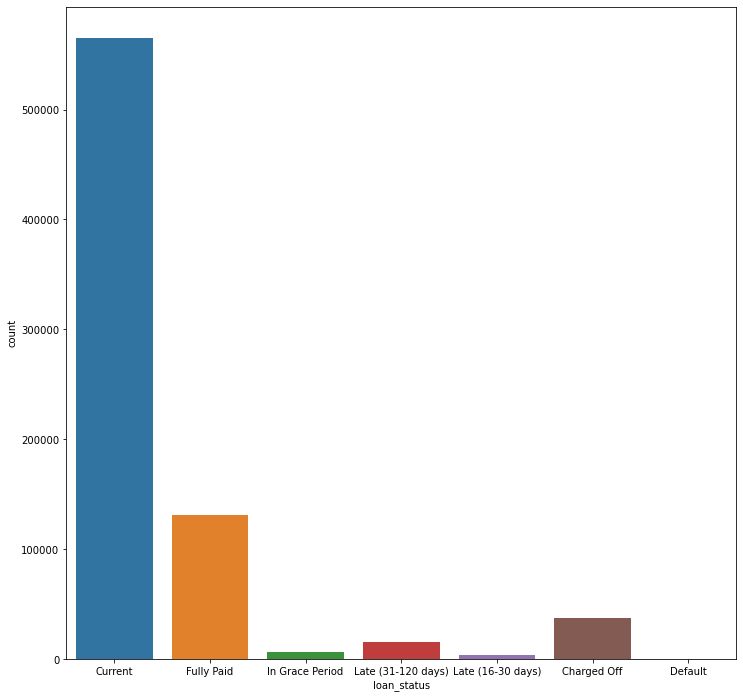

In [23]:
#Our Target Variable is Loan_Status
#Let's take a count of this variable
plt.figure(figsize=(12,12))
sns.countplot(x ='loan_status', data = lc_data_2016_17 )
lc_data_2016_17.groupby(by='loan_status')['loan_amnt'].describe()


<AxesSubplot:xlabel='loan_default', ylabel='count'>

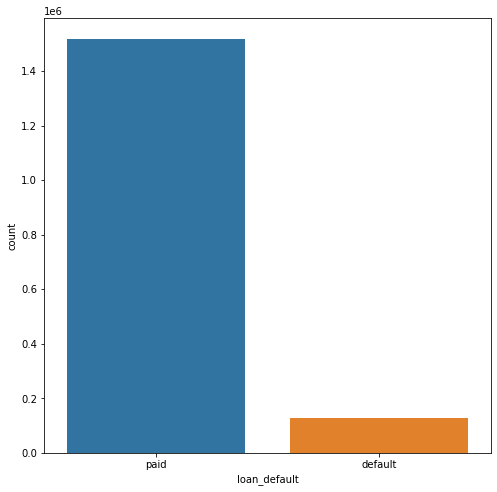

In [18]:
#Our Target Variable is Loan_default
#Let's take a count of this variable
plt.figure(figsize=(8, 8))
sns.countplot(x ='loan_default', data = lc_data )

In [24]:
lc_data.groupby(['purpose']).size().reset_index().rename(columns={0:'count'})  

,purpose,count
0,car,17640
1,credit_card,363950
2,debt_consolidation,955745
3,educational,423
4,home_improvement,109026
5,house,7268
6,major_purchase,35596
7,medical,18900
8,moving,11387
9,other,93574


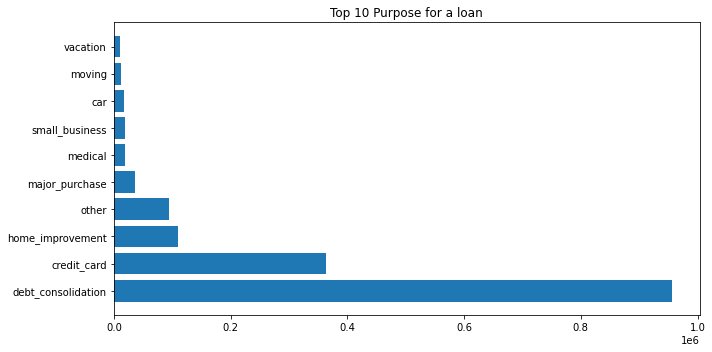

In [25]:
plt.figure(figsize=(10, 5))
plt.barh(lc_data.purpose.value_counts()[:10].index, lc_data.purpose.value_counts()[:10])
plt.title("Top 10 Purpose for a loan")
plt.tight_layout()

<AxesSubplot:xlabel='purpose', ylabel='count'>

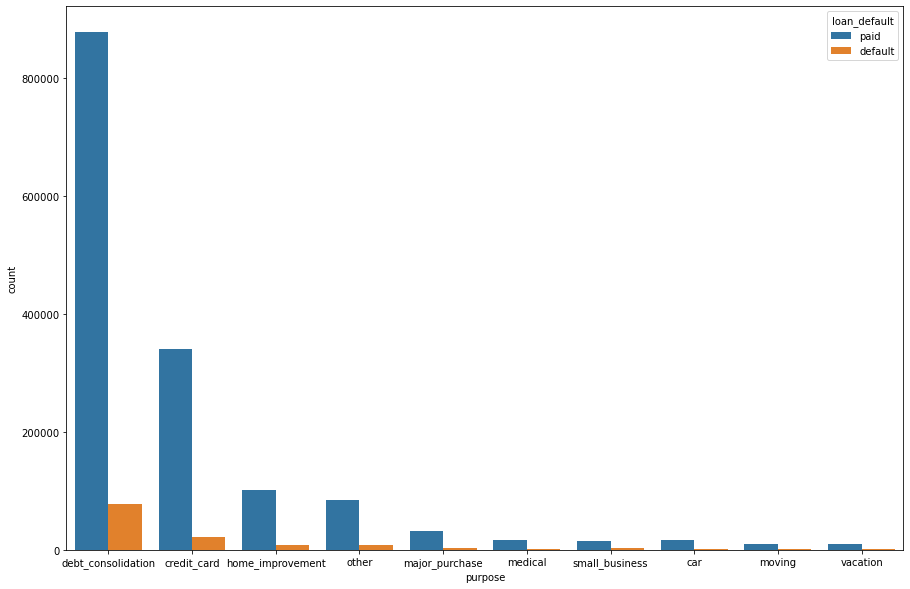

In [26]:
#purpose = sorted(lc_data.purpose.unique()[:1].tolist())
plt.figure(figsize=(15, 10))
sns.countplot(x='purpose', data=lc_data, hue='loan_default',  order = lc_data.purpose.value_counts()[:10].index)

In [ ]:
#lc_data['purpose'].value_counts().index.filter(items=[1,5])
#lc_data.purpose.value_counts()[:10].index

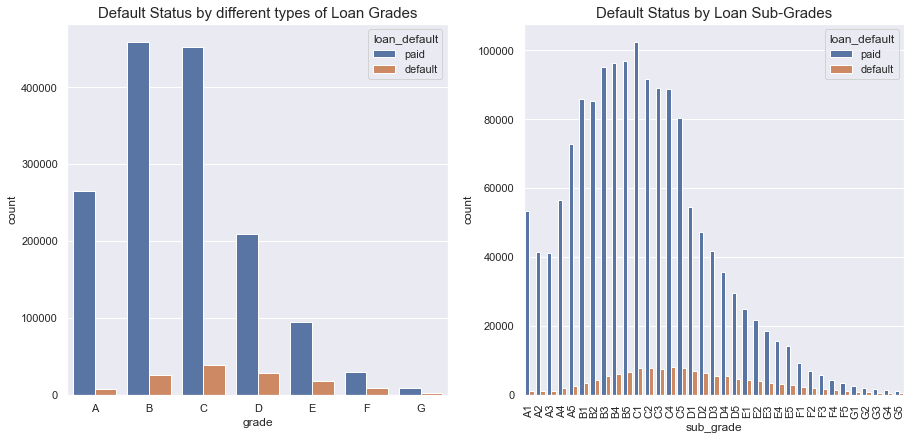

In [82]:
#Visualize the Loan Default by different Loan Grade and Subgrade
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
grade = sorted(lc_data.grade.unique().tolist())
p=sns.countplot(x='grade', data=lc_data, hue='loan_default', order=grade)
p.set_title(label="Default Status by different types of Loan Grades",fontsize=15)
plt.subplot(2, 2, 2)
sub_grade = sorted(lc_data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=lc_data, hue='loan_default', order=sub_grade)
g.set_title(label= "Default Status by Loan Sub-Grades",fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

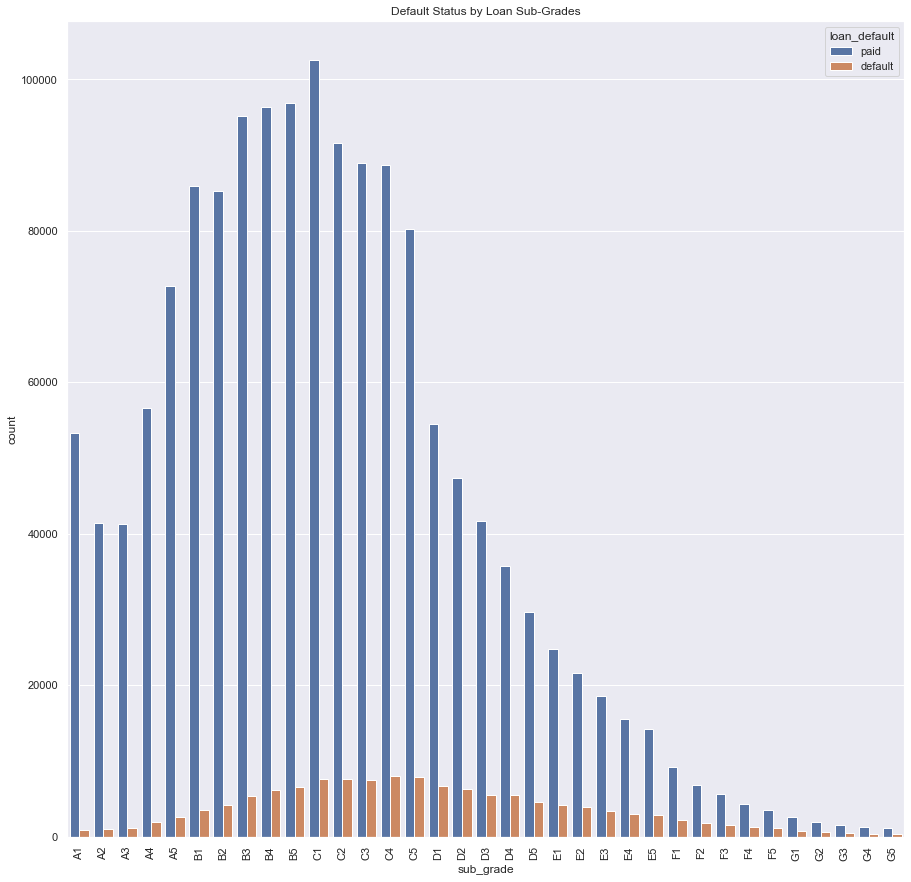

In [76]:
plt.figure(figsize=(15, 15))
sub_grade = sorted(lc_data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=lc_data, hue='loan_default', order=sub_grade)
g.set(title="Default Status by Loan Sub-Grades")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

[Text(0.5, 1.0, 'Loan Status v/s Annual Income')]

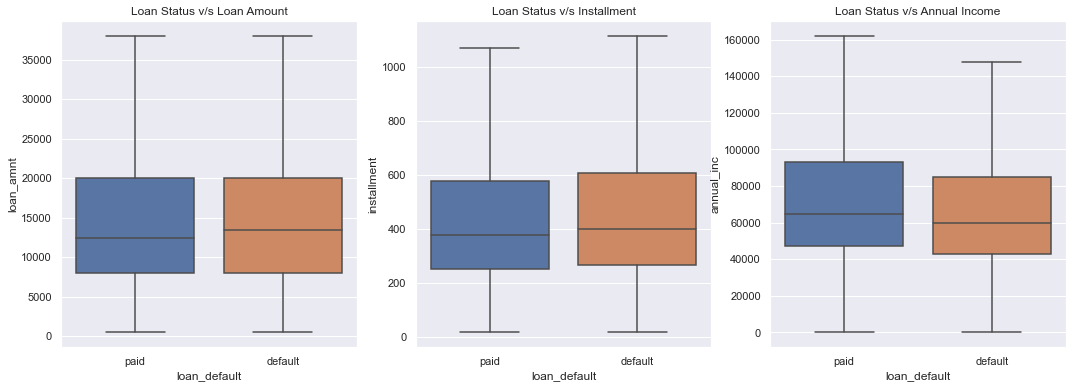

In [107]:
#Visualize Relationships between different candidate variables and Target variable 
#Since the target variable is a Categorical variable we will use box plots to visualize to compare with numerical variables
sns.set(rc = {'figure.figsize':(18,6)})
fig, axs = plt.subplots(ncols=3)

#1. Loan Amount v/s Loan Default
sns.boxplot(x="loan_default", y="loan_amnt",showfliers = False,data=lc_data,ax=axs[0]).set(title="Loan Status v/s Loan Amount")

#2. Loan Installment v/s Loan Default
sns.boxplot(x="loan_default", y="installment",showfliers = False,data=lc_data, ax=axs[1]).set(title="Loan Status v/s Installment")

#3. Annual Income v/s Loan Default
sns.boxplot(x="loan_default", y="annual_inc",showfliers = False,data=lc_data, ax=axs[2]).set(title="Loan Status v/s Annual Income")

<AxesSubplot:>

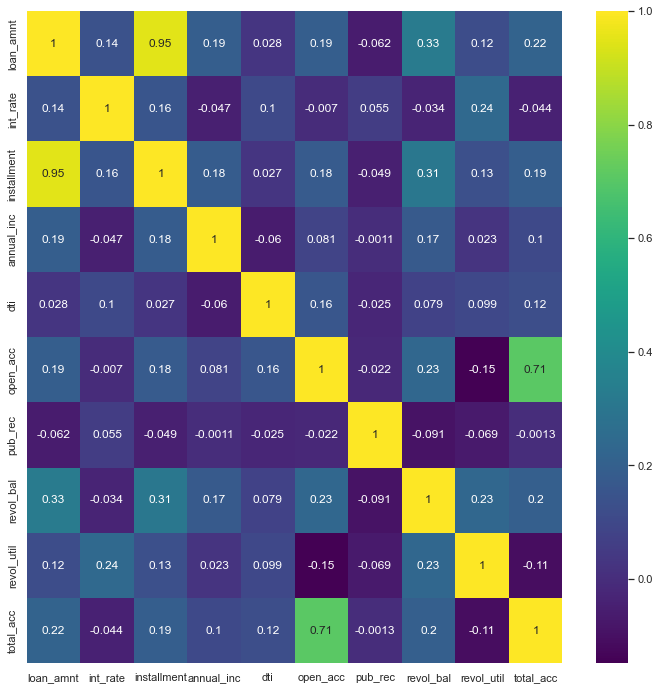

In [35]:
plt.figure(figsize=(12, 12))
sns.heatmap(lc_data.corr(), annot=True, cmap='viridis')

In [36]:
lc_data['emp_title'].value_counts()[:20]

Teacher               28948
Manager               25299
Owner                 15173
Registered Nurse      11931
Supervisor            11920
RN                    11217
Driver                 9968
Sales                  9820
Project Manager        8296
Office Manager         7252
Director               7048
General Manager        6991
owner                  6307
President              5974
Engineer               5569
manager                5538
teacher                5298
Vice President         4945
Operations Manager     4602
Accountant             4287
Name: emp_title, dtype: int64

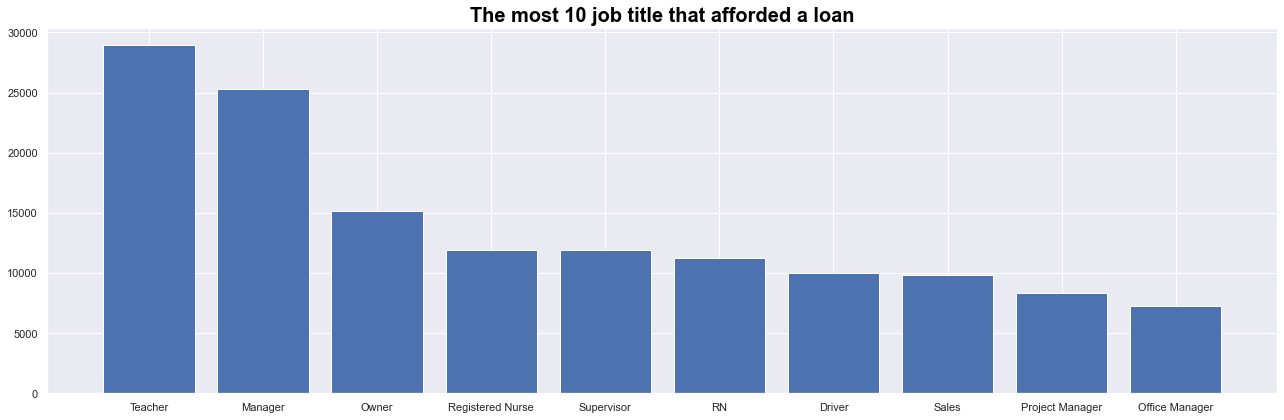

In [44]:
#EDA w.r.t Jobs
font = {'family': 'Arial',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
plt.bar(lc_data.emp_title.value_counts()[:10].index, lc_data.emp_title.value_counts()[:10])
plt.title("The most 10 job title that afforded a loan",fontdict=font)
plt.tight_layout()

Text(0.5, 1.0, 'Top 10 Profession by Loan Status')

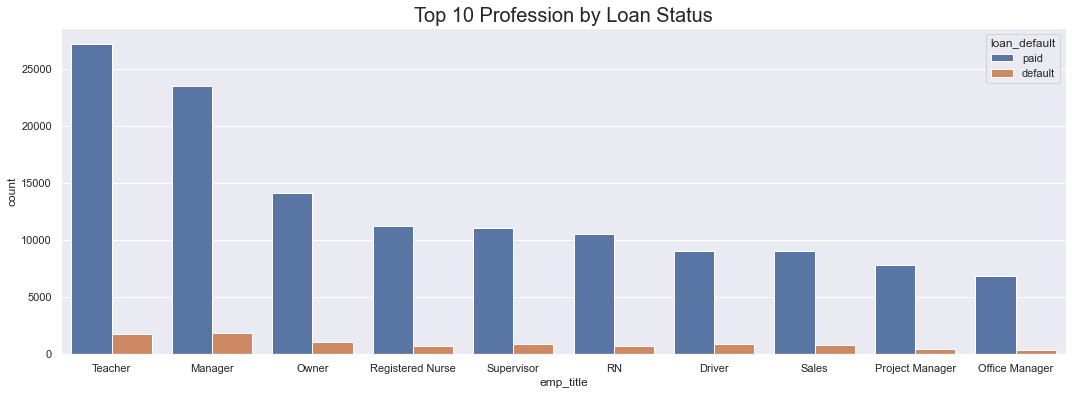

In [48]:
#Surprisingly most of the jobs tend to have a similar value of default rates
p=sns.countplot(x='emp_title', data=lc_data, hue='loan_default',  
              order = lc_data.emp_title.value_counts()[:10].index)
p.set_title("Top 10 Profession by Loan Status",fontsize=20)

In [ ]:
#Missing Values Detection
for column in lc_data.columns:
    if lc_data[column].isna().sum() != 0:
        missing = lc_data[column].isna().sum()
        portion = (missing / lc_data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

In [50]:
lc_month=lc_data[['issue_d','loan_default']]
lc_month['issue_d']=lc_month['issue_d'].str.replace(r'[\d-]', '')

C:\Users\pramo\AppData\Local\Temp/ipykernel_3780/3421265938.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  lc_month['issue_d']=lc_month['issue_d'].str.replace(r'[\d-]', '')
C:\Users\pramo\AppData\Local\Temp/ipykernel_3780/3421265938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lc_month['issue_d']=lc_month['issue_d'].str.replace(r'[\d-]', '')


In [51]:
lc_month

,issue_d,loan_default
0,Dec,paid
1,Dec,default
2,Dec,paid
3,Dec,paid
4,Dec,paid
...,...,...
759333,Jan,paid
759334,Jan,paid
759335,Jan,default
759336,Jan,paid


<AxesSubplot:xlabel='issue_d', ylabel='count'>

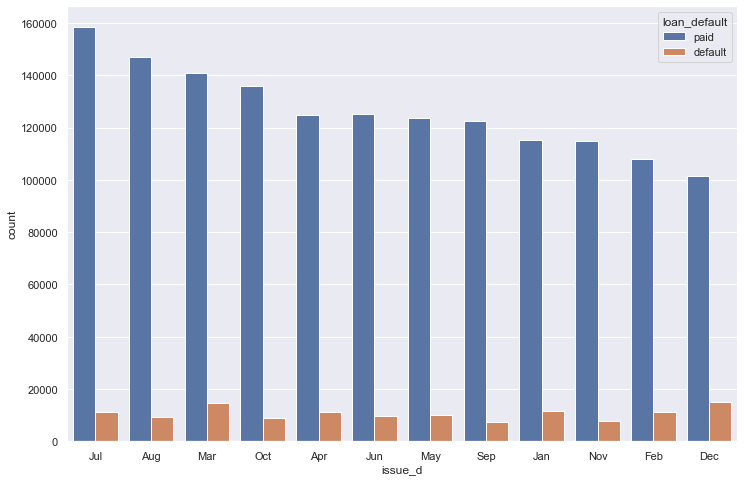

In [52]:
plt.figure(figsize=(12, 8))
sns.countplot(x='issue_d', data=lc_month, hue='loan_default',  order = lc_month.issue_d.value_counts()[:12].index)

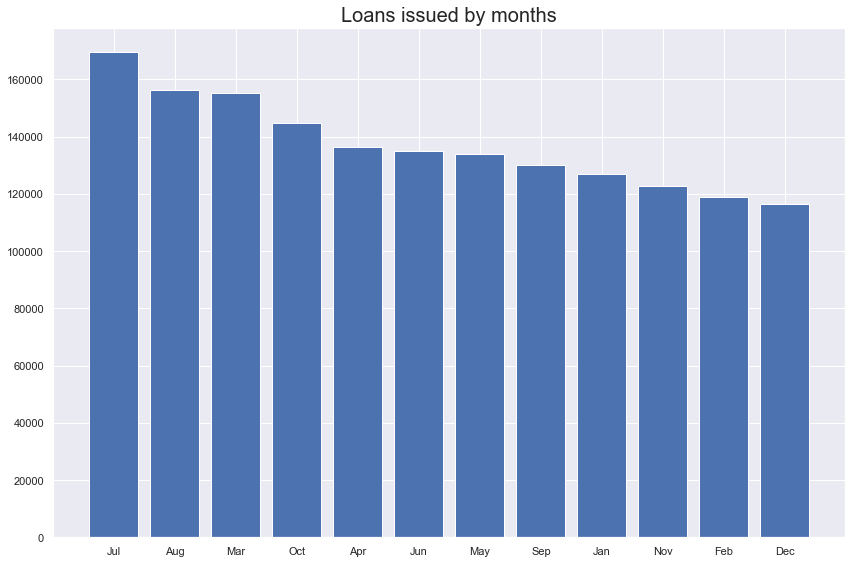

In [54]:
plt.figure(figsize=(12, 8))
plt.bar(lc_month.issue_d.value_counts()[:12].index, lc_month.issue_d.value_counts()[:12])
plt.title("Loans issued by months",fontsize=20)
plt.tight_layout()

In [55]:
lc_year=lc_data[['issue_d','loan_default']]
lc_year['issue_d']=lc_year['issue_d'].str.replace(r'[^\d]', '')

C:\Users\pramo\AppData\Local\Temp/ipykernel_3780/3258567311.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  lc_year['issue_d']=lc_year['issue_d'].str.replace(r'[^\d]', '')
C:\Users\pramo\AppData\Local\Temp/ipykernel_3780/3258567311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lc_year['issue_d']=lc_year['issue_d'].str.replace(r'[^\d]', '')


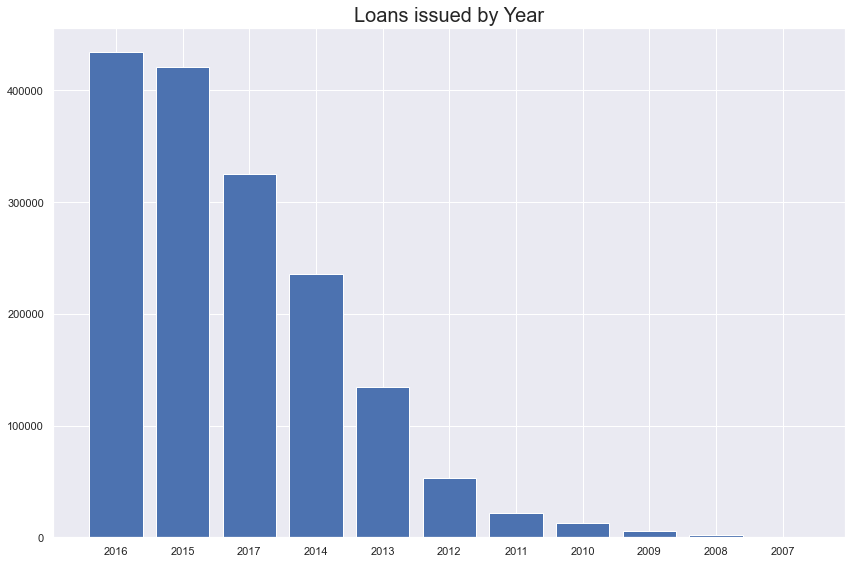

In [87]:
plt.figure(figsize=(12, 8))
plt.bar(lc_year.issue_d.value_counts()[:12].index, lc_year.issue_d.value_counts()[:12])
plt.title("Loans issued by Year",fontsize=20)
plt.tight_layout()

Text(0.5, 0, 'Loan Status')

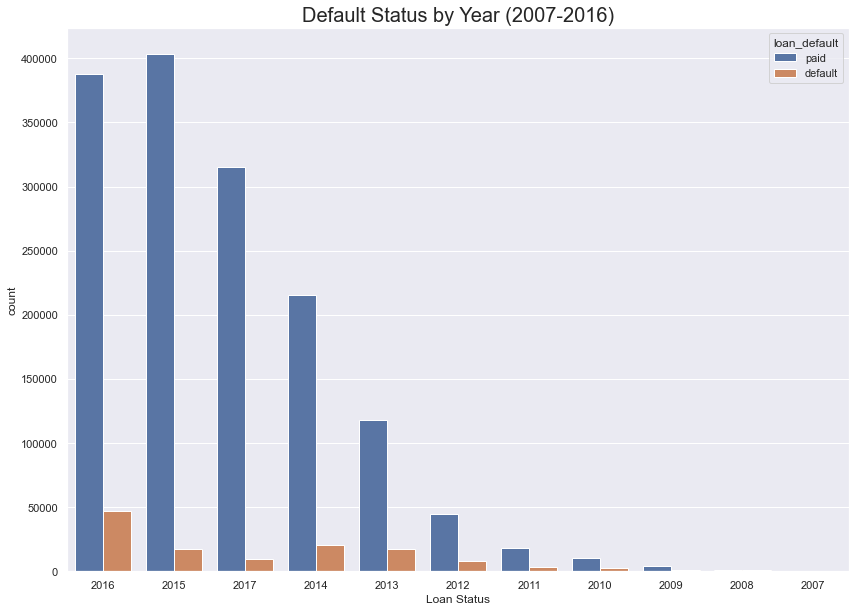

In [88]:
plt.figure(figsize=(14, 10))
p=sns.countplot(x='issue_d', data=lc_year, hue='loan_default',  
              order = lc_year.issue_d.value_counts()[:12].index)

p.set_title(label="Default Status by Year (2007-2016)",fontsize=20)
p.set_xlabel("Loan Status")


In [64]:
years=['2007','2008','2009']
lc_crisis=lc_year[lc_year.issue_d.isin(years)]

Text(0.5, 0, 'Loan Status')

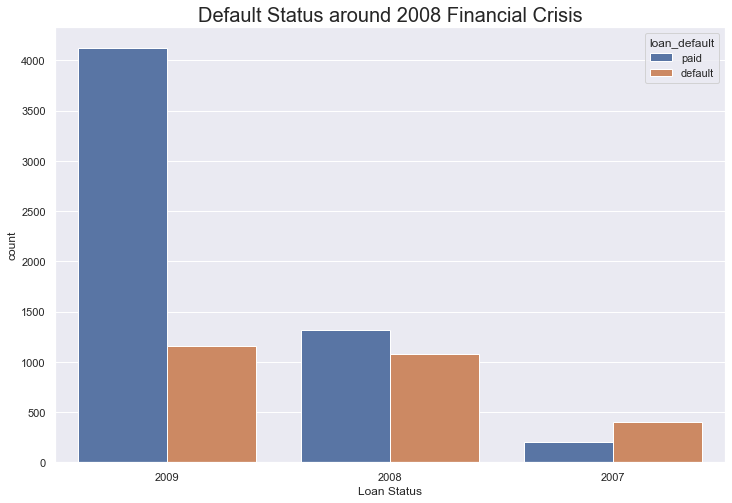

In [89]:
plt.figure(figsize=(12, 8))
p=sns.countplot(x='issue_d', data=lc_crisis, hue='loan_default', 
              order = lc_crisis.issue_d.value_counts()[:12].index)
p.set_title(label="Default Status around 2008 Financial Crisis",fontsize=20)
p.set_xlabel("Loan Status")

In [93]:
lc_data.head(15)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,title,zip_code,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,loan_default
0,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,Computer,860xx,27.65,3.0,0.0,13648.0,83.7,9.0,INDIVIDUAL,paid
1,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,bike,309xx,1.00,3.0,0.0,1687.0,9.4,4.0,INDIVIDUAL,default
2,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,real estate business,606xx,8.72,2.0,0.0,2956.0,98.5,10.0,INDIVIDUAL,paid
3,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,personel,917xx,20.00,10.0,0.0,5598.0,21.0,37.0,INDIVIDUAL,paid
4,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,Personal,972xx,17.94,15.0,0.0,27783.0,53.9,38.0,INDIVIDUAL,paid
5,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,My wedding loan I promise to pay back,852xx,11.20,9.0,0.0,7963.0,28.3,12.0,INDIVIDUAL,paid
6,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,Loan,280xx,23.51,7.0,0.0,17726.0,85.6,11.0,INDIVIDUAL,paid
7,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,...,Car Downpayment,900xx,5.35,4.0,0.0,8221.0,87.5,4.0,INDIVIDUAL,paid
8,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,...,Expand Business & Buy Debt Portfolio,958xx,5.55,11.0,0.0,5210.0,32.6,13.0,INDIVIDUAL,default
9,5375.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,...,Building my credit history.,774xx,18.08,2.0,0.0,9279.0,36.5,3.0,INDIVIDUAL,default


Text(0.5, 1.0, 'Default Status by grade during 2007-2009')

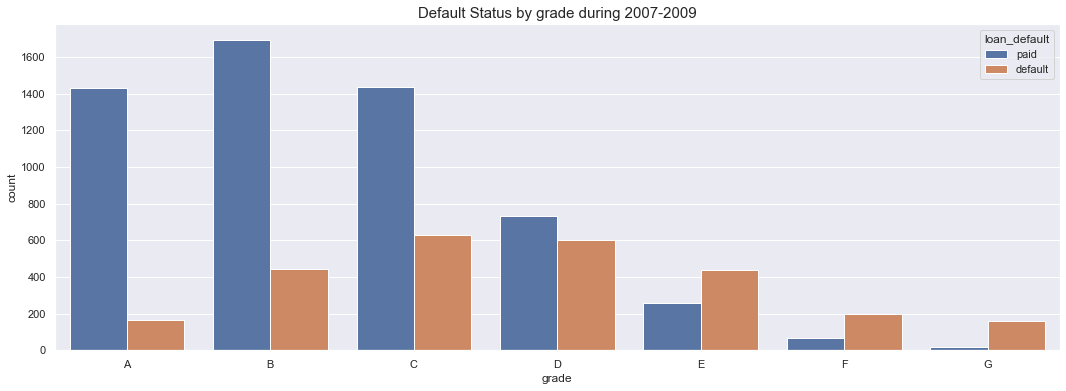

In [106]:
grade = sorted(lc_crisis_grade.grade.unique().tolist())
p=sns.countplot(x='grade', data=lc_crisis_grade, hue='loan_default', order=grade)
p.set_title(label="Default Status by grade during 2007-2009",fontsize=15)

In [112]:
lc_mod1=lc_data.groupby(['sub_grade','loan_default']).count().reset_index(level='loan_default')
lc22=lc_mod1[['loan_default','loan_status']]
lc22=lc22.astype({'loan_status': 'int'})
percentage=[]
i=0
while i<=(lc22.shape[0]-1):
    percentage.append(lc22.iloc[i][1]/(lc22.iloc[i][1]+lc22.iloc[i+1][1]))
    i=i+2


In [113]:
lc22=lc22.reset_index(level="sub_grade")

In [114]:
subgrade=lc22['sub_grade'].unique()
final=pd.DataFrame(subgrade,percentage)
final=final.reset_index()
final['index']=final['index']*100

In [115]:
final=final.sort_values(by='index',ascending=True)
final

,index,0
0,1.677017,A1
1,2.257539,A2
2,2.605779,A3
3,3.177589,A4
4,3.398045,A5
5,3.894985,B1
6,4.668060,B2
7,5.303844,B3
8,5.950337,B4
9,6.375553,B5


[Text(0.5, 0, 'Sub Grades'), Text(0, 0.5, 'Percentage of Defaulters')]

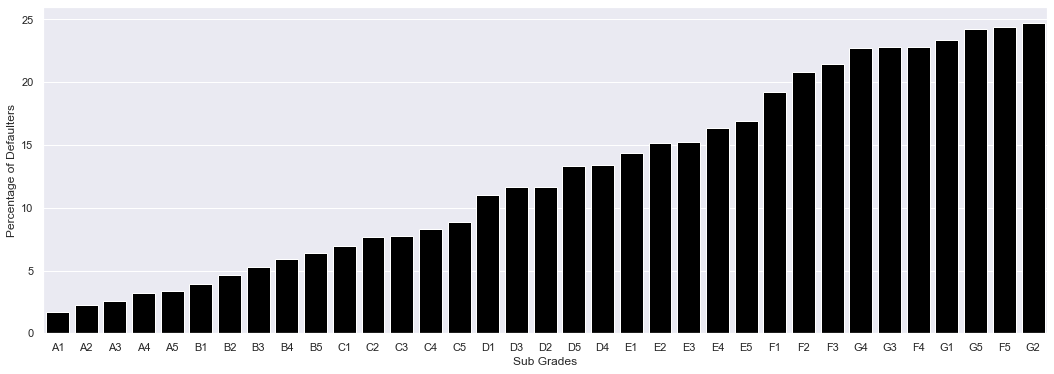

In [116]:
#ax = sns.barplot(x="day", y="total_bill", data=tips)
g=sns.barplot(x=0, y='index',data=final, color='black')
g.set(xlabel='Sub Grades', ylabel='Percentage of Defaulters')

#g.set_xticklabels(g.get_xticklabels(), rotation=90)